# Final Project - Agustin Lastra


# 3.Exploratory Analysis Writeup   

Planning to use shopping data provided by Instacart

**Initial Hypothesis:**      

+Users with healthier lifestyle and habits order during certain days of the week.   
+Larger orders of products are ordered during certain times of the week.   
+Certain products will lead to frequent re-ordering, driving sales.   



### Setup

In [1]:
##import the needed Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt # Matlab-style plott
import seaborn as sns
color = sns.color_palette(sns.hls_palette(8, l=.3, s=.8))

%matplotlib inline



In [2]:
#importing data into dataframes
#Read in data from source 
#“The Instacart Online Grocery Shopping Dataset 2017”, Accessed from https://www.instacart.com/datasets/grocery-shopping-2017 on <date>

df_orders = pd.read_csv('instacart_2017_05_01/orders.csv')
df_products = pd.read_csv('instacart_2017_05_01/products.csv')
df_aisles = pd.read_csv('instacart_2017_05_01/aisles.csv')
df_departments = pd.read_csv('instacart_2017_05_01/departments.csv')
df_order_products_train = pd.read_csv('instacart_2017_05_01/order_products__train.csv')
df_order_products_prior = pd.read_csv('instacart_2017_05_01/order_products__prior.csv')

In [3]:

df_orders
df_products
df_aisles
df_departments
df_order_products_train 
df_order_products_prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [4]:
#Viewing the headers of columns for each dataframe to understand their relationships


df_orders.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [5]:
df_products.head()


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
df_aisles.head()


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
df_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [8]:
df_order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [9]:
df_order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


Please see below a quick description of what each column represents and how the different dataframes are connected:

**df_orders**

orders (3.4m rows, 206k users):

order_id: order identifier
user_id: customer identifier
eval_set: which evaluation set this order belongs in (see SET described below)
order_number: the order sequence number for this user (1 = first, n = nth)
order_dow: the day of the week the order was placed on
order_hour_of_day: the hour of the day the order was placed on
days_since_prior: days since the last order, capped at 30 (with NAs for order_number = 1)

**df_products **

products (50k rows):

product_id: product identifier
product_name: name of the product
aisle_id: foreign key
department_id: foreign key

**df_aisles**
aisles (134 rows):

aisle_id: aisle identifier
aisle: the name of the aisle

**df_departments **
departments (21 rows):

department_id: department identifier
department: the name of the department


**df_order_products_train**   
**and**  
**df_order_products_prior**  

order_products__SET (30m+ rows):

order_id: foreign key
product_id: foreign key
add_to_cart_order: order in which each product was added to cart
reordered: 1 if this product has been ordered by this user in the past, 0 otherwise

where SET is one of the four following evaluation sets (eval_set in orders):

"prior": orders prior to that users most recent order (~3.2m orders)
"train": training data supplied to participants (~131k orders)
"test": test data reserved for machine learning competitions (~75k orders)



As we can see the dataframe of Orders contains most of the information pertinent to all orders. This dataframe is already broken into three different categories: prior, train and test. We'll need to use prior an train to then measure our algorithm on the test set. 




Firstly, let's evaluate how many orders we have in each set.

In [10]:
evalset = df_orders.eval_set.value_counts()
print evalset

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64


Next how many users are in each set.

In [11]:
evalset = df_orders.groupby("eval_set")["user_id"].nunique()
print evalset

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64


Missing Data, even though the data was provided and cleaned by the Instacart team for this kaggle competition. Let's still check that the data isn't missing anything.

In [12]:
a = df_orders.isnull().sum()
b= df_products.isnull().sum()
c= df_aisles.isnull().sum()
d= df_departments.isnull().sum()
e=df_order_products_train.isnull().sum()
f=df_order_products_prior.isnull().sum()


In [13]:
print a
print b
print c
print d
print e
print f

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64
aisle_id    0
aisle       0
dtype: int64
department_id    0
department       0
dtype: int64
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


It seems like the data set is complete, the only fields that contains empty values is days_since_prior_order, which has a number that coincides with the number of users. Therefore, I assume the field is empty for their first order since they have no prior order.



### Time

As two of our hypothesis have time dimension in them, let's see how the data is distributed across hours and days of the week.

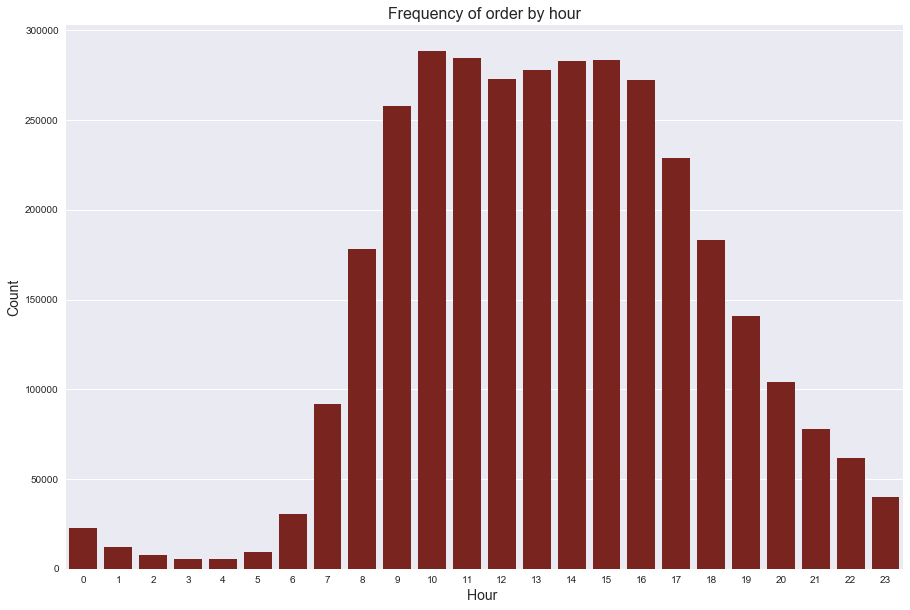

In [14]:
plt.figure(figsize=(15,10))
sns.countplot(x="order_hour_of_day", data=df_orders, color=color[0])
plt.ylabel('Count', fontsize=14)
plt.xlabel('Hour ', fontsize=14)
plt.title("Frequency of order by hour", fontsize=16)
plt.show()

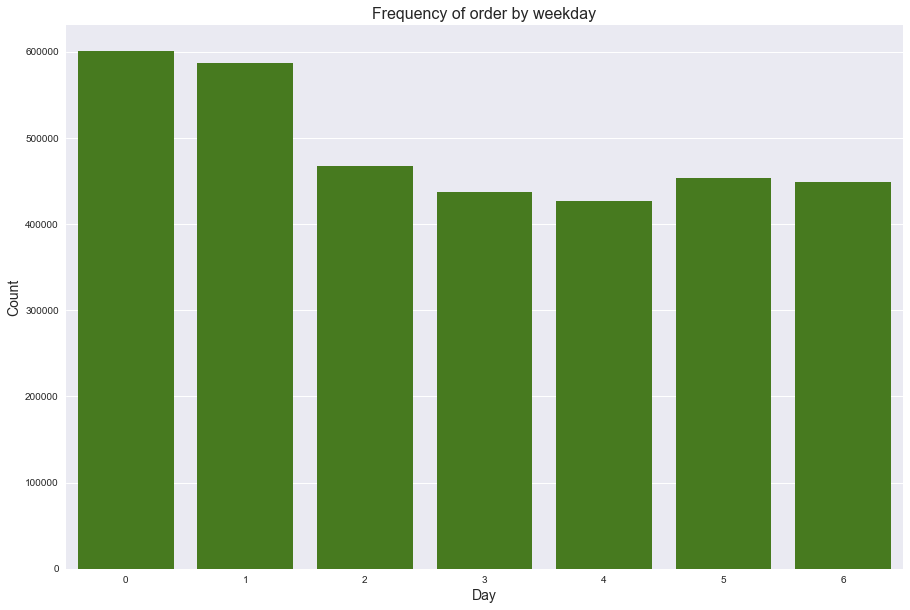

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(x="order_dow", data=df_orders, color=color[2])
plt.ylabel('Count', fontsize=14)
plt.xlabel('Day', fontsize=14)
plt.title("Frequency of order by weekday", fontsize=16)
plt.show()

If we combine the distributions above we can create a hit map that would help us see the moments of the week with most order traffic and such.

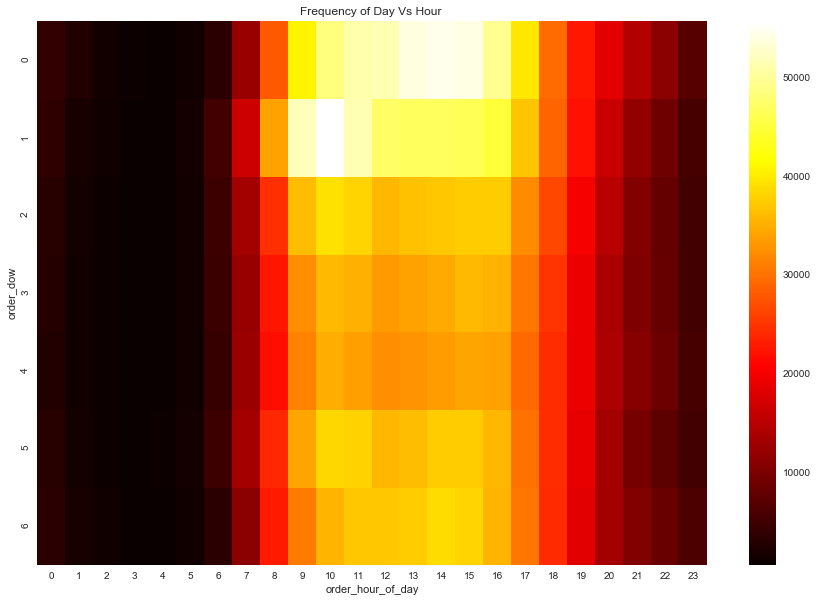

In [16]:
df_hourday = df_orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
df_hourday = df_hourday.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(15,10))
sns.heatmap(df_hourday,cmap="hot")
plt.title("Frequency of Day Vs Hour ")
plt.show()

We see that the days with most orders are Sunday (0) and Monday (1). We can see that most of the order traffic happens between 9am and 5pm. 

### Order Size and Frequency
Next field to evaluate is the number of products per purchase and days that transcurred since last order.

In [17]:
df_order_products_all = pd.concat([df_order_products_prior, df_order_products_train], axis=0)
df_order_products_all.order_id.nunique()

3346083

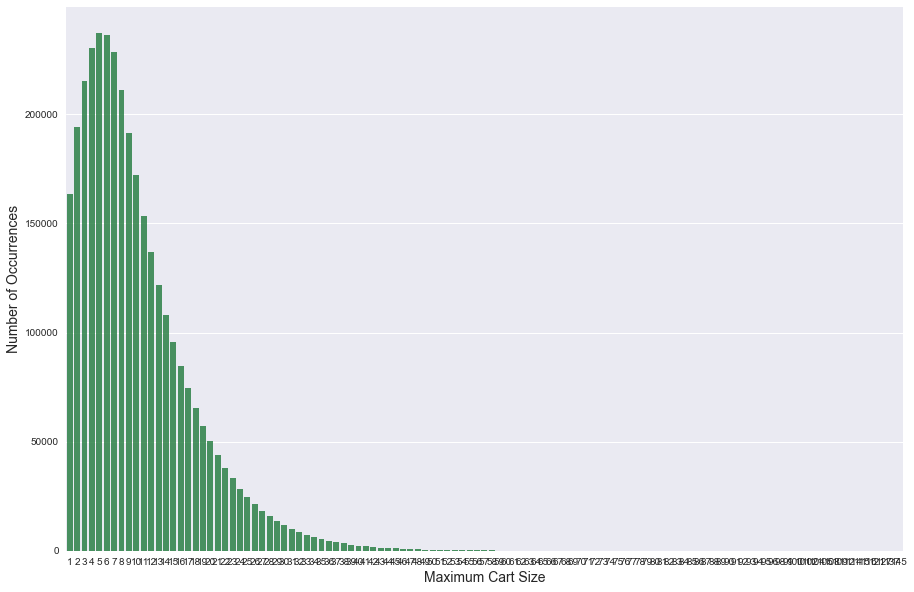

In [18]:
df_hproducts = df_order_products_all.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
df_hproducts = df_hproducts.add_to_cart_order.value_counts()

plt.figure(figsize=(15,10))
sns.barplot(df_hproducts.index, df_hproducts.values, alpha=0.8, color=color[3])
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xlabel('Maximum Cart Size', fontsize=14)
plt.show()

We can see that size of the carts has it high at 5 and steadily decreases after 10 products.

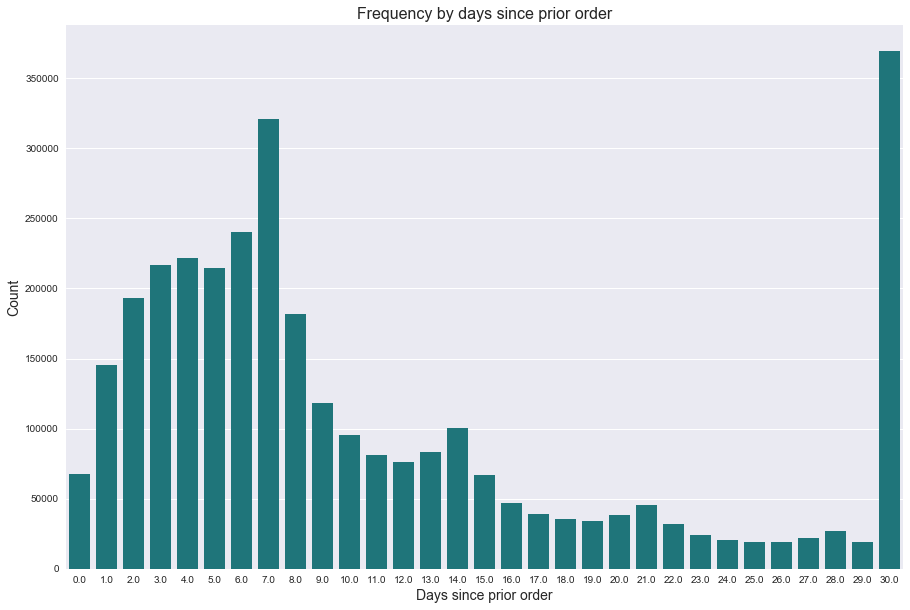

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(x="days_since_prior_order", data=df_orders, color=color[4])
plt.ylabel('Count', fontsize=14)
plt.xlabel('Days since prior order', fontsize=14)
plt.title("Frequency by days since prior order", fontsize=16)
plt.show()

We can see that the highest frequency is 30, the data set has a max value of 30 for this feature so this could be why it's maxed. Moreover, within less than 30 days we see 7 days with the highest frequency. Other multiples of 7 seem to be local spikes. 


## Completing dataset
Putting together different tables in order to be able to see

In [20]:
df_matrix= df_order_products_all.copy()
df_matrix = pd.merge(df_matrix, df_products, on='product_id', how='left')
df_matrix = pd.merge(df_matrix, df_aisles, on='aisle_id', how='left')
df_matrix = pd.merge(df_matrix, df_departments, on='department_id', how='left')
df_matrix.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


### Products, Aisles and Departments
In the following section, we look to see which Products, Aisles and Departments have the most frequency.

In [21]:
pcount = df_matrix['product_name'].value_counts().reset_index().head(10)
pcount.columns = ['product_name', 'frequency_count']
pcount

,product_name,frequency_count
0,Banana,491291
1,Bag of Organic Bananas,394930
2,Organic Strawberries,275577
3,Organic Baby Spinach,251705
4,Organic Hass Avocado,220877
5,Organic Avocado,184224
6,Large Lemon,160792
7,Strawberries,149445
8,Limes,146660
9,Organic Whole Milk,142813


In [22]:
aislecount = df_matrix['aisle'].value_counts().reset_index().head(10)
aislecount.columns = ['aisle', 'frequency_count']
aislecount

,aisle,frequency_count
0,fresh fruits,3792661
1,fresh vegetables,3568630
2,packaged vegetables fruits,1843806
3,yogurt,1507583
4,packaged cheese,1021462
5,milk,923659
6,water seltzer sparkling water,878150
7,chips pretzels,753739
8,soy lactosefree,664493
9,bread,608469


In [23]:
deptcount = df_matrix['department'].value_counts().reset_index().head(10)
deptcount.columns = ['department', 'frequency_count']
deptcount

,department,frequency_count
0,produce,9888378
1,dairy eggs,5631067
2,snacks,3006412
3,beverages,2804175
4,frozen,2336858
5,pantry,1956819
6,bakery,1225181
7,canned goods,1114857
8,deli,1095540
9,dry goods pasta,905340


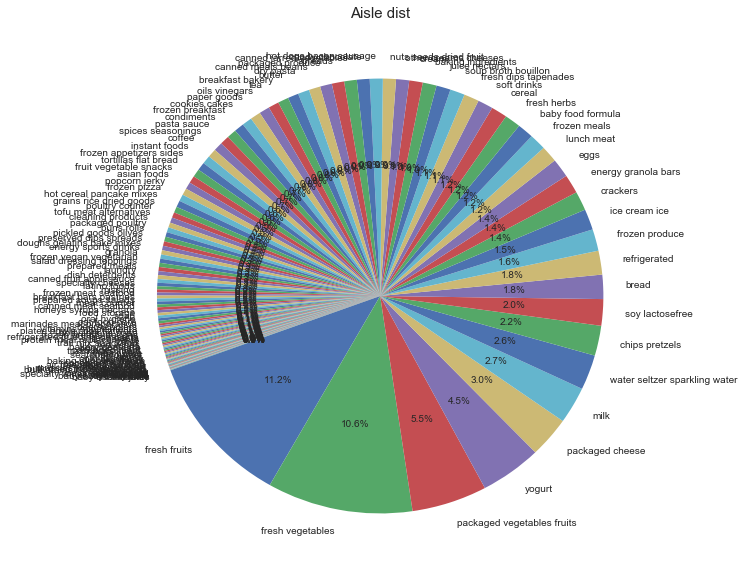

In [24]:
plt.figure(figsize=(10,10))
temp_series = df_matrix['aisle'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Aisle dist", fontsize=15)
plt.show()

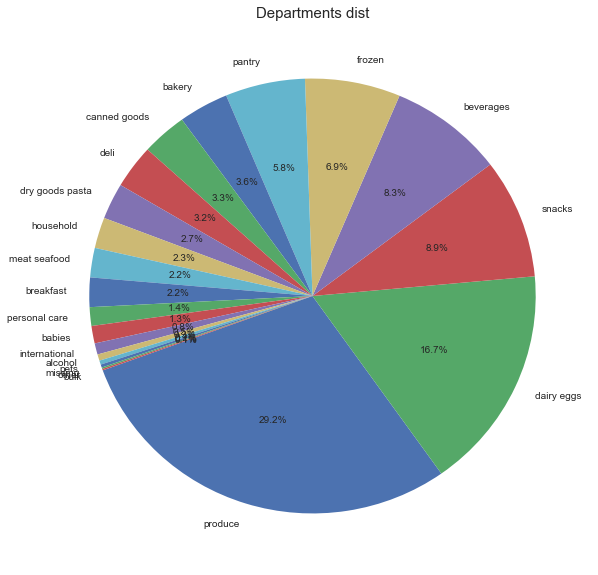

In [25]:
plt.figure(figsize=(10,10))
temp_series = df_matrix['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments dist", fontsize=15)
plt.show()

As we consider the top most ordered products, we can see that Bananas by far the most ordered item. The most ordered items are fruits and vegetables followed by dairy. We continue to see this trend thru aisles and finally reflected in departments.The Produce ,Dairy Department represent nearly 50% of orders.

### Reordering Products

In [26]:
# percentage of re-orders
float(df_matrix['reordered'].sum())/float(df_matrix['reordered'].count())

0.5900617242809434

In [27]:
# Orders with no reordering

df_noreorder = df_matrix.groupby("order_id")["reordered"].aggregate("sum").reset_index()
df_noreorder["reordered"].ix[df_noreorder["reordered"]>1] = 1
df_noreorder.reordered.value_counts() / df_noreorder.shape[0]

1    0.881319
0    0.118681
Name: reordered, dtype: float64

In [28]:
# Products re-order and probability of re-order
reorder = df_matrix.groupby("product_id")["reordered"].aggregate({'reorder_sum': sum,'reorder_total': 'count'}).reset_index()
reorder['reorder_probability'] = reorder['reorder_sum'] / reorder['reorder_total']
reorder = pd.merge(reorder, df_products[['product_id', 'product_name']], how='left', on=['product_id'])
reorder.head(10)

,product_id,reorder_sum,reorder_total,reorder_probability,product_name
0,1,1185,1928,0.614627,Chocolate Sandwich Cookies
1,2,13,94,0.138298,All-Seasons Salt
2,3,209,283,0.738516,Robust Golden Unsweetened Oolong Tea
3,4,161,351,0.458689,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,10,16,0.625000,Green Chile Anytime Sauce
5,6,3,8,0.375000,Dry Nose Oil
6,7,13,31,0.419355,Pure Coconut Water With Orange
7,8,90,178,0.505618,Cut Russet Potatoes Steam N' Mash
8,9,84,161,0.521739,Light Strawberry Blueberry Yogurt
9,10,1374,2691,0.510591,Sparkling Orange Juice & Prickly Pear Beverage


In [29]:
reorder.sort(columns='reorder_probability', axis=0, ascending=False).head(25)


/Users/alastra/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,product_id,reorder_sum,reorder_total,reorder_probability,product_name
6431,6433,65,69,0.942029,Raw Veggie Wrappers
2074,2075,84,90,0.933333,Serenity Ultimate Extrema Overnight Pads
43550,43553,12,13,0.923077,Orange Energy Shots
27737,27740,94,102,0.921569,Chocolate Love Bar
14606,14609,32,35,0.914286,Soy Powder Infant Formula
13872,13875,41,45,0.911111,Simply Sleep Nighttime Sleep Aid
39989,39992,20,22,0.909091,"Energy Shot, Grape Flavor"
5866,5868,27,30,0.900000,Russian River Valley Reserve Pinot Noir
36540,36543,62,69,0.898551,Bars Peanut Butter
26090,26093,60,67,0.895522,Soy Crisps Lightly Salted


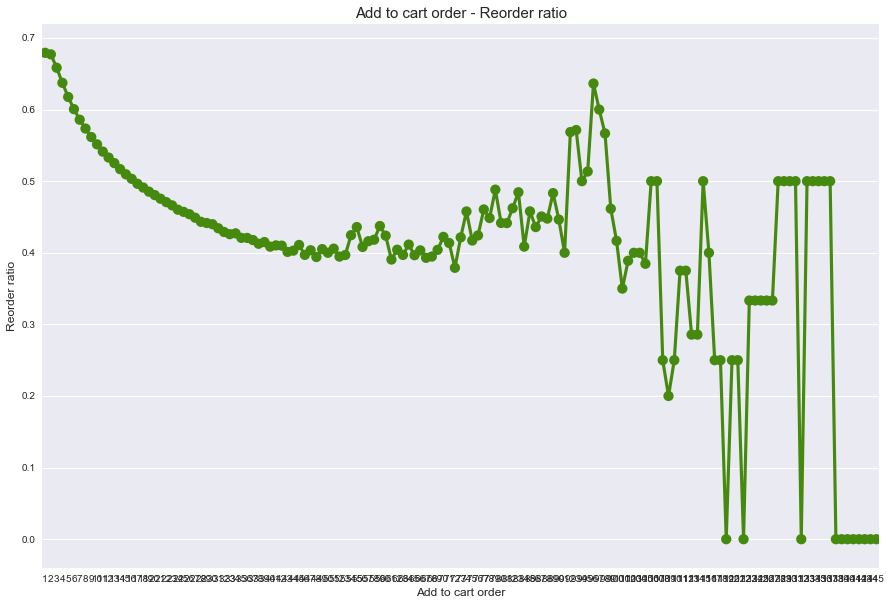

In [30]:
df_matrix["add_to_cart_order_mod"] = df_matrix["add_to_cart_order"].copy()
df_reordered = df_matrix.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(15,10))
sns.pointplot(df_reordered['add_to_cart_order_mod'].values, df_reordered['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.show()

 ### Reordering  on the basis of time

In [31]:
df_time = pd.merge(df_matrix,df_orders,on='order_id', how='left')

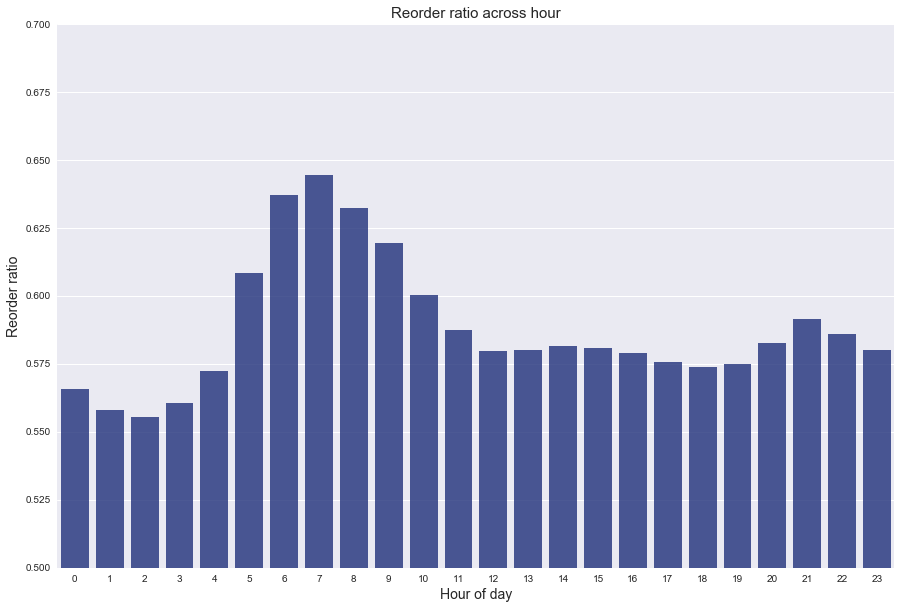

In [32]:
df_timea = df_time.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(15,10))
sns.barplot(df_timea['order_hour_of_day'].values, df_timea['reordered'].values, alpha=0.8, color=color[5])
plt.ylabel('Reorder ratio', fontsize=14)
plt.xlabel('Hour of day', fontsize=14)
plt.title("Reorder ratio across hour", fontsize=15)
plt.ylim(0.5, 0.7)
plt.show()


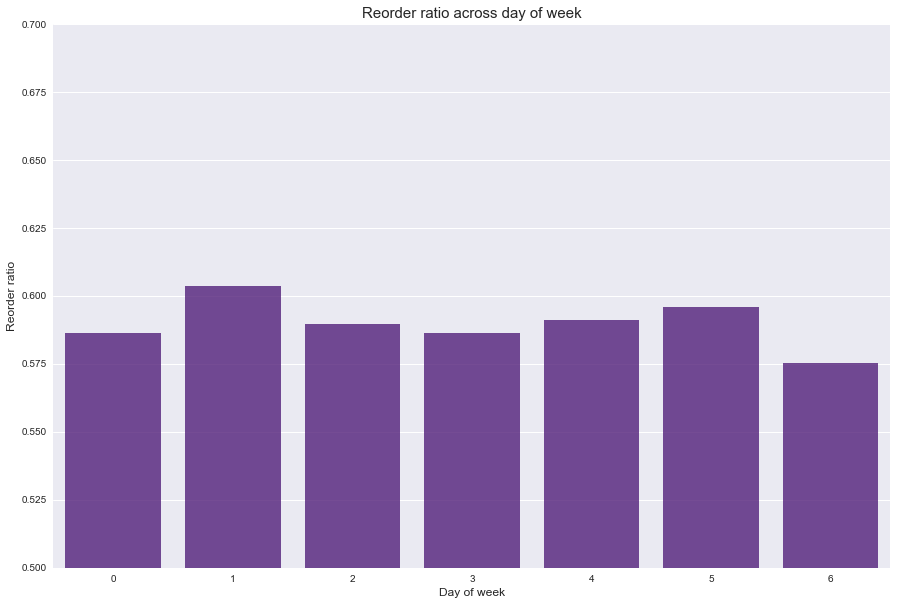

In [33]:
df_timeb = df_time.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(15,10))
sns.barplot(df_timeb['order_dow'].values, df_timeb['reordered'].values, alpha=0.8, color=color[6])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder ratio across day of week", fontsize=15)
plt.ylim(0.5, 0.7)
plt.show()

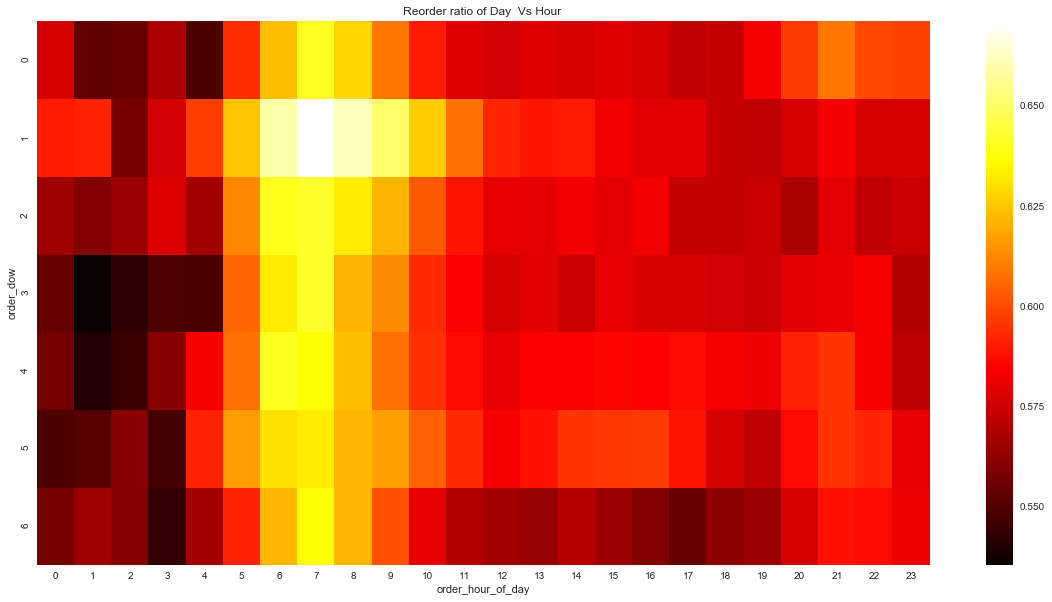

In [34]:
df_timec = df_time.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
df_timec = df_timec.pivot('order_dow', 'order_hour_of_day', 'reordered')

plt.figure(figsize=(20,10))
sns.heatmap(df_timec,cmap="hot")
plt.title("Reorder ratio of Day  Vs Hour ")
plt.show()


##  Conclusion and Data Manipulation

As I conclude my exploratory analysis and begin to contemplate models to approach my different hypothesis's:

**Initial Hypothesis:**      

+Users with healthier lifestyle and habits order during certain days of the week.   
+Larger orders of products are ordered during certain times of the week.   
+Certain products will lead to frequent re-ordering, driving sales.   

and the Kaggle **Hypothesis** : Instacart is challenging the Kaggle community to use this anonymized data on customer orders over time to predict which previously purchased products will be in a user’s next order.


My initial hypothesis's either require more data (health rank of products), aren't predictive problems or classification problems. The kaggle hypothesis is very difficult for me to approach with my current knowledge and known models, having to deal with high dimensionality among other issues. It seems to require a Multiclass and multilabel algorithms.


Therefore, I will attempt to create a model that predicts quantity of products per order based hour of the day, day of the week and departments. 


In [35]:
df_a=df_time.copy()
df_a.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,add_to_cart_order_mod,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,2,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,3,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,4,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,5,202279,prior,3,5,9,8.0


In [36]:
df_hproducts = df_order_products_all.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
df_hproducts.columns = ['order_id', 'basket_count']
df_hproducts

,order_id,basket_count
0,1,8
1,2,9
2,3,8
3,4,13
4,5,26
5,6,3
6,7,2
7,8,1
8,9,15
9,10,15


In [37]:

df_b = pd.merge(df_a, df_hproducts, on='order_id', how='left')
df_b.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,add_to_cart_order_mod,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,basket_count
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,1,202279,prior,3,5,9,8.0,9
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,2,202279,prior,3,5,9,8.0,9
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,3,202279,prior,3,5,9,8.0,9
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,4,202279,prior,3,5,9,8.0,9
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,5,202279,prior,3,5,9,8.0,9


In [38]:
df_c = df_b.copy()

In [39]:
del df_c['product_id']
del df_c['add_to_cart_order']
del df_c['product_name']
del df_c['aisle_id']
del df_c['department_id']
del df_c['aisle']
del df_c['add_to_cart_order_mod']
df_c.head()

,order_id,reordered,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,basket_count
0,2,1,dairy eggs,202279,prior,3,5,9,8.0,9
1,2,1,produce,202279,prior,3,5,9,8.0,9
2,2,0,pantry,202279,prior,3,5,9,8.0,9
3,2,1,pantry,202279,prior,3,5,9,8.0,9
4,2,0,pantry,202279,prior,3,5,9,8.0,9


In [40]:
df_d=df_c.copy()

In [41]:
df_d= pd.get_dummies(df_c, columns=['department'], drop_first=True)

In [42]:
df_d.head()

,order_id,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,basket_count,department_babies,...,department_household,department_international,department_meat seafood,department_missing,department_other,department_pantry,department_personal care,department_pets,department_produce,department_snacks
0,2,1,202279,prior,3,5,9,8.0,9,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,202279,prior,3,5,9,8.0,9,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,202279,prior,3,5,9,8.0,9,0,...,0,0,0,0,0,1,0,0,0,0
3,2,1,202279,prior,3,5,9,8.0,9,0,...,0,0,0,0,0,1,0,0,0,0
4,2,0,202279,prior,3,5,9,8.0,9,0,...,0,0,0,0,0,1,0,0,0,0


In [43]:
df_e=df_d.copy()

In [44]:
del df_e['order_number']
del df_e['order_dow']

In [45]:

del df_e['order_hour_of_day']
del df_e['days_since_prior_order']
df_e.head()

,order_id,reordered,user_id,eval_set,basket_count,department_babies,department_bakery,department_beverages,department_breakfast,department_bulk,...,department_household,department_international,department_meat seafood,department_missing,department_other,department_pantry,department_personal care,department_pets,department_produce,department_snacks
0,2,1,202279,prior,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,202279,prior,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,202279,prior,9,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2,1,202279,prior,9,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2,0,202279,prior,9,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [46]:
del df_e['user_id']
del df_e['basket_count']
del df_e['eval_set']
df_e.head()

,order_id,reordered,department_babies,department_bakery,department_beverages,department_breakfast,department_bulk,department_canned goods,department_dairy eggs,department_deli,...,department_household,department_international,department_meat seafood,department_missing,department_other,department_pantry,department_personal care,department_pets,department_produce,department_snacks
0,2,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [47]:
df_f =  df_e.groupby("order_id").aggregate("max").reset_index()

df_f.head()

,order_id,reordered,department_babies,department_bakery,department_beverages,department_breakfast,department_bulk,department_canned goods,department_dairy eggs,department_deli,...,department_household,department_international,department_meat seafood,department_missing,department_other,department_pantry,department_personal care,department_pets,department_produce,department_snacks
0,1,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,3,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,4,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,5,1,0,0,1,0,0,0,1,1,...,1,1,1,0,0,1,1,0,1,1


In [48]:
df_f.to_csv('checkpointf.csv')

In [49]:
df_g=df_c.copy()
df_g.head()

,order_id,reordered,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,basket_count
0,2,1,dairy eggs,202279,prior,3,5,9,8.0,9
1,2,1,produce,202279,prior,3,5,9,8.0,9
2,2,0,pantry,202279,prior,3,5,9,8.0,9
3,2,1,pantry,202279,prior,3,5,9,8.0,9
4,2,0,pantry,202279,prior,3,5,9,8.0,9


In [50]:
del df_g['reordered']
del df_g['department']
df_g.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,basket_count
0,2,202279,prior,3,5,9,8.0,9
1,2,202279,prior,3,5,9,8.0,9
2,2,202279,prior,3,5,9,8.0,9
3,2,202279,prior,3,5,9,8.0,9
4,2,202279,prior,3,5,9,8.0,9


In [51]:
df_h=  pd.merge(df_f, df_g, on='order_id', how='left')

In [52]:
df_h.head()

,order_id,reordered,department_babies,department_bakery,department_beverages,department_breakfast,department_bulk,department_canned goods,department_dairy eggs,department_deli,...,department_pets,department_produce,department_snacks,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,basket_count
0,1,1,0,0,0,0,0,1,1,0,...,0,1,0,112108,train,4,4,10,9.0,8
1,1,1,0,0,0,0,0,1,1,0,...,0,1,0,112108,train,4,4,10,9.0,8
2,1,1,0,0,0,0,0,1,1,0,...,0,1,0,112108,train,4,4,10,9.0,8
3,1,1,0,0,0,0,0,1,1,0,...,0,1,0,112108,train,4,4,10,9.0,8
4,1,1,0,0,0,0,0,1,1,0,...,0,1,0,112108,train,4,4,10,9.0,8


In [53]:
df_h.loc[0].transpose()

order_id                           1
reordered                          1
department_babies                  0
department_bakery                  0
department_beverages               0
department_breakfast               0
department_bulk                    0
department_canned goods            1
department_dairy eggs              1
department_deli                    0
department_dry goods pasta         0
department_frozen                  0
department_household               0
department_international           0
department_meat seafood            0
department_missing                 0
department_other                   0
department_pantry                  0
department_personal care           0
department_pets                    0
department_produce                 1
department_snacks                  0
user_id                       112108
eval_set                       train
order_number                       4
order_dow                          4
order_hour_of_day                 10
d

In [54]:
df_h.to_csv('cleandata.csv')

In [55]:
df_h

,order_id,reordered,department_babies,department_bakery,department_beverages,department_breakfast,department_bulk,department_canned goods,department_dairy eggs,department_deli,...,department_pets,department_produce,department_snacks,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,basket_count
0,1,1,0,0,0,0,0,1,1,0,...,0,1,0,112108,train,4,4,10,9.0,8
1,1,1,0,0,0,0,0,1,1,0,...,0,1,0,112108,train,4,4,10,9.0,8
2,1,1,0,0,0,0,0,1,1,0,...,0,1,0,112108,train,4,4,10,9.0,8
3,1,1,0,0,0,0,0,1,1,0,...,0,1,0,112108,train,4,4,10,9.0,8
4,1,1,0,0,0,0,0,1,1,0,...,0,1,0,112108,train,4,4,10,9.0,8
5,1,1,0,0,0,0,0,1,1,0,...,0,1,0,112108,train,4,4,10,9.0,8
6,1,1,0,0,0,0,0,1,1,0,...,0,1,0,112108,train,4,4,10,9.0,8
7,1,1,0,0,0,0,0,1,1,0,...,0,1,0,112108,train,4,4,10,9.0,8
8,2,1,0,0,0,0,0,0,1,0,...,0,1,0,202279,prior,3,5,9,8.0,9
9,2,1,0,0,0,0,0,0,1,0,...,0,1,0,202279,prior,3,5,9,8.0,9
